### This jupyter notebook is used as modeling for capstone 1

Step related to data wrangling, please review here: 
https://github.com/jiaqixu/Springboard/blob/master/Capstone/Capstone1/data_wrangling_capstone1.ipynb

Step related to exploratory data analysis, please review here:
https://github.com/jiaqixu/Springboard/blob/master/Capstone/Capstone1/exploratory_data_analysis_capstone1.ipynb

Step related to pre-processing and training data, please review here:
https://github.com/jiaqixu/Springboard/blob/master/Capstone/Capstone1/pre-processing_and_training_data_development_capstone1.ipynb

Load libraries

In [139]:
import os 
import pandas as pd
import operator
from datetime import datetime,date
from calendar import monthrange
import numpy as np
import math
from matplotlib import style
import matplotlib.pyplot as plt
from random import sample
from scipy import stats
import warnings
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer
from xgboost import XGBClassifier
%matplotlib inline

Load files

In [10]:
base_os = 'G:\Data\Machine_Learning_Library\spring_board_data_science\Capstone\Capstone1\clean_data'
#choose one train_ind as an example
train_ind = 0
train_file = "\set"+str(train_ind)+"_Feature.csv"
target_file = "\set"+str(train_ind)+"_Target.csv"
X = pd.read_csv(base_os+train_file,index_col=0)
y = pd.read_csv(base_os+target_file, index_col=0)

Split X and y

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X,np.ravel(y),test_size=0.2,shuffle=True, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

#### Machine Learning Methods
Random Forest

In [79]:
#param_grid = { 
#    'n_estimators': [500, 1000, 1500, 2000, 2500],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [10,15,20,25,30],
#    'criterion' :['gini', 'entropy'],
#    'max_samples' : [100, 300, 500, 600, 700]
#}

#scorers = {
    #'precision_score': 'precision',
#    'accuracy_score': 'accuracy'
#}

param_grid = { 
    'n_estimators': [1000, 2000],
    'max_features': ['auto'],
    'max_depth' : [30],
    'max_samples' : [500, 700]
}
rfc = RandomForestClassifier(random_state=42)
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = scorers, refit = 'accuracy_score')
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'accuracy')

CV_rfc.fit(X_train, y_train)
print("Best Parameters are:", CV_rfc.best_params_)
print("Best accuracy score is:", round(CV_rfc.best_score_,4))
print("Train accuracy is:", round(CV_rfc.score(X_train,y_train),4))
print("Test accurracy is:", round(CV_rfc.score(X_test,y_test),4))

Best Parameters are: {'max_depth': 30, 'max_features': 'auto', 'max_samples': 700, 'n_estimators': 2000}
Best accuracy score is: 0.5121
Train accuracy is: 0.5638
Test accurracy is: 0.5147


In [121]:
# def plot features function
def plot_features_import(features, perform):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    #features = X.columns
    y_pos = np.arange(len(features))
    perform = (perform-perform.min())/(perform.max()-perform.min())*100
    dic = dict(zip(features,perform))

    sorted_perform = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    ax.barh(y_pos, sorted_perform.values(), align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sorted_perform.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Performance')
    return plt.show()

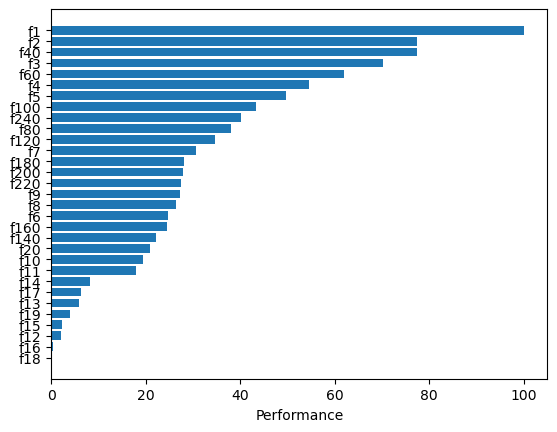

In [122]:
plot_features_import(features = X.columns, perform = CV_rfc.best_estimator_.feature_importances_)

Features f1, f2, f40 are top three important features by random forest method (5 folder cv) with above hyper parameters.

K-Nearest-Neighbors (KNN)

In [130]:
grid_params = {
    #'n_neighbors': [3,5,11,19],
    'n_neighbors': [3],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
KNN_gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv =5,
    n_jobs=-1
)
KNN_gs.fit(X_train, y_train)
print("Best Parameters are:", KNN_gs.best_params_)
print("Best accuracy score is:", round(KNN_gs.best_score_,4))
print("Train accuracy is:", round(KNN_gs.score(X_train,y_train),4))
print("Test accurracy is:", round(KNN_gs.score(X_test,y_test),4))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.5min finished


Best Parameters are: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best accuracy score is: 0.5052
Train accuracy is: 0.7575
Test accurracy is: 0.5073


Support Vector Machine (SVM)

In [133]:
from sklearn.svm import SVC  
grid_params = {
    #'C': [0.1, 1, 10], 
    'C': [0.1,1],
    #'gamma': [1,0.1,0.01,0.001],
    'gamma': [0.1],
    #'kernel': ['rbf', 'poly', 'sigmoid']
    }

SVC_gs = GridSearchCV(SVC(),grid_params,cv =5, verbose=1, n_jobs=-1)
SVC_gs.fit(X_train,y_train)
print("Best Parameters are:", SVC_gs.best_params_)
print("Best accuracy score is:", round(SVC_gs.best_score_,4))
print("Train accuracy is:", round(SVC_gs.score(X_train,y_train),4))
print("Test accurracy is:", round(SVC_gs.score(X_test,y_test),4))

Logistic Regression (LOG)

In [137]:
param_grid ={
    'C': np.logspace(-3,3,7), 
    #'penalty': ["l1","l2"],
    'penalty':["l2"],
    'solver': ["newton-cg","lbfgs"],
    'max_iter': [10000, 20000]
}# l1 lasso l2 ridge
logreg=LogisticRegression()
CV_logreg=GridSearchCV(logreg,param_grid=param_grid,cv=5)
CV_logreg.fit(X_train,y_train)
print("Best Parameters are:", CV_logreg.best_params_)
print("Best accuracy score is:", round(CV_logreg.best_score_,4))
print("Train accuracy is:", round(CV_logreg.score(X_train,y_train),4))
print("Test accurracy is:", round(CV_logreg.score(X_test,y_test),4))

Best Parameters are: {'C': 0.01, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy score is: 0.5094
Train accuracy is: 0.5092
Test accurracy is: 0.5048


XGBoost

In [141]:
xgb = XGBClassifier()
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.02], #so called `eta` value
              'max_depth': [6, 10],
              'min_child_weight': [5,10],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

CV_xgb = GridSearchCV(xgb, param_grid, n_jobs=5, 
                   #cv=StratifiedKFold(y_train, n_folds=5, shuffle=True), 
                   cv=5,
                   scoring='roc_auc',
                   verbose=2, refit=True)
CV_xgb.fit(X_train, y_train)
print("Best Parameters are:", CV_xgb.best_params_)
print("Best accuracy score is:", round(CV_xgb.best_score_,4))
print("Train accuracy is:", round(CV_xgb.score(X_train,y_train),4))
print("Test accurracy is:", round(CV_xgb.score(X_test,y_test),4))

In [142]:
xgb = XGBClassifier(colsample_bytree=0.7, learning_rate = 0.05, max_depth = 6, min_child_weight = 11, missing = -999,
                    n_estimators = 5, nthread = 4, objective = 'binary:logistic', seed = 1337, silent = 1, subsample = 0.8)
#print(xgb.set_params)
xgb.fit(X_train, y_train)
print("Train accuracy is:", round(xgb.score(X_train,y_train),4))
print("Test accurracy is:", round(xgb.score(X_test,y_test),4))

Train accuracy is: 0.5273
Test accurracy is: 0.5122


Ensemble Classification (Random Forest, K-nearest-neighbor, Support vector machine, logistic regression, xgboost)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
estimators = []
model1 =  RandomForestClassifier(n_estimators=2000, 
                                 max_depth=30, 
                                 max_features = 'log2', 
                                 max_samples = 700, 
                                 random_state=42)
estimators.append(('Random_forest', model1))

model2 = KNeighborsClassifier(n_neighbors = 3,
                           weights = 'distance',
                           metric = 'euclidean')
estimators.append(('KNN', model2))

model3 =  LogisticRegression(C=0.01, max_iter=10000, penalty = 'l2', solver='newton-cg')
estimators.append(('logistic', model3))

model4 = XGBClassifier(colsample_bytree=0.7, learning_rate = 0.05, max_depth = 6, min_child_weight = 11, missing = -999,
                    n_estimators = 5, nthread = 4, objective = 'binary:logistic', seed = 1337, silent = 1, subsample = 0.8)

estimators.append(('xgb', model4))

#model5 = SVC()
#estimators.append(('svm', model5))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=5)
print(results.mean())

### Deep Learning
Multiple Layer Propagation (MLP)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


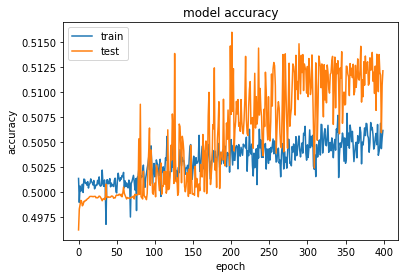

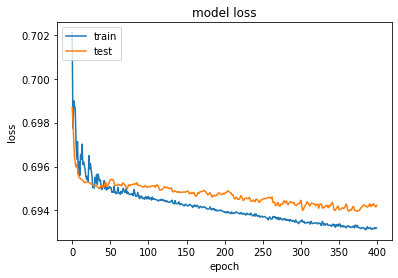

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Embedding, GRU, SimpleRNN, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
#from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.regularizers import l1
def MLP_model():
    # create model
    model = Sequential()
    model.add(Dense(31, input_dim = 31, kernel_regularizer=l1(0.00001), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim = 31, kernel_regularizer=l1(0.00001), activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, input_dim = 10, kernel_regularizer=l1(0.00001), activation = 'relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(2, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

model = MLP_model()
#print(model.summary())
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
#model.fit(X_train, y_train, epochs=400, batch_size=4096)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=0)

# evaluate the model
#train_acc = model.evaluate(X_train, y_train, verbose=0)
#test_acc = model.evaluate(X_test, y_test, verbose=0)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
history = model.fit(X_train, y_train, validation_split=0.20, epochs=400, batch_size=8192,verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

history = model.fit(X_train, y_train, validation_split=0.20, epochs=100, batch_size=8192,verbose=0)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

In [192]:
model = MLP_model()
history = model.fit(X_train, y_train, epochs=200, batch_size=8192,verbose=0)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print("train accuracy", train_acc)
print("test accuracy", test_acc)

train accuracy [0.6935978583550825, 0.5037811398506165]
test accuracy [0.6936017143646942, 0.5014562010765076]


Recurrent Neural Network (RNN)

Train on 110972 samples, validate on 27743 samples
Epoch 1/3
110972/110972 [==============================] - 212s 2ms/step - loss: 0.6943 - accuracy: 0.5024 - val_loss: 0.6937 - val_accuracy: 0.4992
Epoch 2/3
110972/110972 [==============================] - 174s 2ms/step - loss: 0.6933 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 3/3
110972/110972 [==============================] - 180s 2ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4992


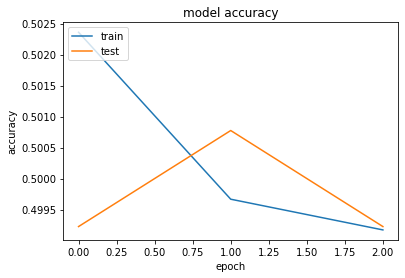

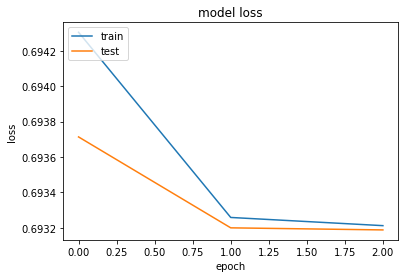

In [195]:
def RNN_model():
    # create model
    model = Sequential()
    model.add(Embedding(input_dim=256, output_dim=64))

    # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
    model.add(GRU(256, return_sequences=True))

    # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
    model.add(SimpleRNN(128,activation='sigmoid'))
    #model.add(layers.Dense(10))

    #model.summary()
    #model.add(Dense(2, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    return model

model = RNN_model()
history = model.fit(X_train, y_train, validation_split=0.20, epochs=3, batch_size=8192)
# list all data in history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#history = model.fit(X_train, y_train, validation_split=0.20, epochs=100, batch_size=8192,verbose=0)
#train_acc = model.evaluate(X_train, y_train, verbose=0)
#test_acc = model.evaluate(X_test, y_test, verbose=0)

In [196]:
#model = RNN_model()
#history = model.fit(X_train, y_train, epochs=3, batch_size=8192,verbose=0)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print("train accuracy", train_acc)
print("test accuracy", test_acc)

train accuracy [0.6931758204109069, 0.5000035762786865]
test accuracy [0.693196022887623, 0.498716801404953]


LSTM

Train on 110972 samples, validate on 27743 samples
Epoch 1/10
110972/110972 [==============================] - 81s 729us/step - loss: 0.7233 - accuracy: 0.5006 - val_loss: 0.6947 - val_accuracy: 0.4992
Epoch 2/10
110972/110972 [==============================] - 74s 665us/step - loss: 0.6965 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 3/10
110972/110972 [==============================] - 79s 712us/step - loss: 0.6941 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 4/10
110972/110972 [==============================] - 83s 745us/step - loss: 0.6935 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.4993
Epoch 5/10
110972/110972 [==============================] - 74s 670us/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 6/10
110972/110972 [==============================] - 76s 683us/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 7/10
110972/110972 [=================

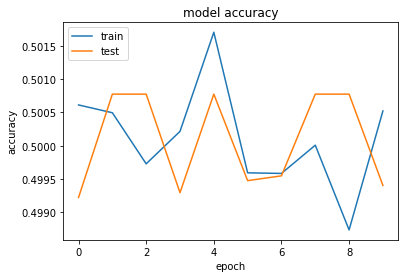

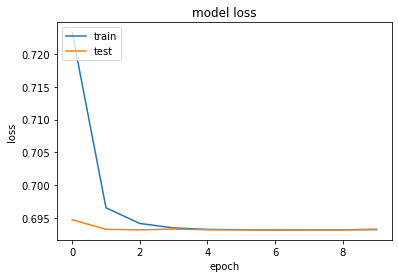

In [187]:
#from keras.callbacks import EarlyStopping
def LSTM_model():
    model = Sequential()
    # Add an Embedding layer expecting input vocab of size 1000, and
    # output embedding dimension of size 64.
    model.add(Embedding(input_dim=256, output_dim=64))

    # Add a LSTM layer with 128 internal units.
    model.add(LSTM(128,activation='sigmoid'))
    # Add a Dense layer with 10 units.
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    return model

model = LSTM_model()
history = model.fit(X_train, y_train, validation_split=0.20, epochs=10, batch_size=8192)
# list all data in history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [189]:
model = LSTM_model()
history = model.fit(X_train, y_train, epochs=5, batch_size=8192,verbose=1)
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print("train accuracy", train_acc)
print("test accuracy", test_acc)

Epoch 1/5
138715/138715 [==============================] - 85s 613us/step - loss: 0.6931 - accuracy: 0.5005
Epoch 2/5
138715/138715 [==============================] - 88s 634us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
138715/138715 [==============================] - 88s 633us/step - loss: 0.6932 - accuracy: 0.4999
Epoch 4/5
138715/138715 [==============================] - 89s 638us/step - loss: 0.6932 - accuracy: 0.5022
Epoch 5/5
138715/138715 [==============================] - 108s 777us/step - loss: 0.6932 - accuracy: 0.4981
train accuracy [0.6931384221549179, 0.5003929138183594]
test accuracy [0.6931520745021984, 0.4992070198059082]


| Method | Train_Accuracy | Test_Accuracy |
| --- | --- | --- |
| Random Forest (RF) | 0.5638 | 0.5147 |
| K Nearest Neighbors (KNN) | 0.7575 | 0.5073 |
| Logistic Regression (LOG) | 0.5092 | 0.5048 |
| XG Boost (CV) | 0.5273 | 0.5122 |
| Multiple Layer Propagation (MLP) | 0.5038 | 0.5015 |
| Recurrent Neural Network (RNN) | 0.5000? | 0.4987? |
| Long Short Term Memory (LSTM)| 0.5003? | 0.4992? |

From the above table, we find Random Forest and XG Boost perform better than other methods. RNN and LSTM are not the "true" results since I only ran 3 epohes (running speed is low). I will use cloud computation to tune more hyper parameters later.

### Trading Part

In [167]:
from function import *
#os.getcwd()
#deprecate runtime warning
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

prefix_market = 'sp500'
#prefix_market = 'FTSE100'
base_os = 'G:\Data\Machine_Learning_Library\spring_board_data_science\Capstone\Capstone1\data'
#os1 = os.path.join(base_os, prefix_market,'cleaned_data')
#os2 = os.path.join(base_os, prefix_market,'download_data_revise')
start_date = '2005-01-01'
end_date = '2020-01-01'
##load all data
filename = prefix_market + "_matrix_utd.csv"
origdat_matrix = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='symbol')
origdat_matrix.columns = origdat_matrix.columns.astype('datetime64[ns]')
print("The size of \"{}\" is: {}".format(filename, origdat_matrix.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Close.csv"
origdat = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
##clean origdat
origdat = rm_extreme_price(origdat)
print("The size of \"{}\" is: {}".format(filename, origdat.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Open.csv"
origdat_o = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, origdat_o.shape))

filename = prefix_market + "_index_data_01-01-2000_05-20-2020.csv"
sp500 =  pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, sp500.shape))

sp500 = pd.DataFrame(sp500['Close'])
sp500.columns = ['SP500']
#sp500.head()
origdat = origdat.merge(sp500, how = 'left', left_index=True, right_index=True)



#set for training periods
first_period1 = [datetime.strptime(item,'%Y-%m-%d') for item in ['2005-01-01', '2008-01-01', '2009-01-01']]
nrows1 = diff_year(datetime.strptime('2009-01-01','%Y-%m-%d'),datetime.strptime('2020-01-01','%Y-%m-%d'))+1
periods1=[]
for i in range(nrows1):
    periods1.append(list(map(lambda period: add_years(period,i), first_period1)))
    
periods1 = pd.DataFrame(periods1)
periods1.columns = ['train_start','trad_start','trad_end']
periods1 = periods1.apply(pd.to_datetime)

#set_dict1
set_dict1 = data_quality(nrows1,periods1,origdat_matrix,origdat) 
m = list(range(1,21))
for k in range(2,13):
    m.append(k*20)

print("There are total {} training and trading sets.".format(periods1.shape[0]))

train_ind = 0
cur_key = set_dict1[periods1.iloc[train_ind,0]]
start_date = periods1.iloc[train_ind,0]
end_date = periods1.iloc[train_ind,1]

#print(cur_key[-10:]+["SP500"])
cur_dat = origdat.loc[start_date:end_date,cur_key]
#cur_dat.fillna(method = 'ffill',inplace=True)
cur_dat.fillna(method = 'ffill',inplace=True)

print("Start Trading!")
trad_key = set_dict1[periods1.iloc[train_ind,0]]
start_date = periods1.iloc[train_ind,0]
end_date = periods1.iloc[train_ind,2]

#print(cur_key[-10:]+["SP500"])
total_dat = origdat.loc[start_date:end_date,cur_key]

#cur_dat.fillna(method = 'ffill',inplace=True)
total_dat.fillna(method = 'ffill',inplace=True)
#use mean to replace 0
total_dat = total_dat.apply(lambda x: x.replace(0,x.mean()), axis = 0)
total_dat.head()

start_dat1 = cur_dat.shape[0]
end_dat1 = total_dat.shape[0]

avg_ret =[]

The size of "sp500_matrix_utd.csv" is: (711, 145)
remove stocks: ['TIE', 'BMC', 'PCL', 'POM', 'GAS', 'EMC', 'HOT', 'HAR', 'CHK', 'SCG']
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Close.csv" is: (3774, 626)
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Open.csv" is: (3774, 636)
The size of "sp500_index_data_01-01-2000_05-20-2020.csv" is: (5128, 5)
There are total 12 training and trading sets.
Start Trading!


In [172]:
#all_ret, all_pred_ac, all_cnf = train_trade_all(dat=origdat,set_dict=set_dict1,periods=periods1, m=m, method="RF", cv="False",sel_k=3)
avg_ret, avg_pred_ac, avg_cnf = train_trade_once(dat=origdat,set_dict=set_dict1,train_ind=3, periods=periods1, m=m, method="RF", cv="False",sel_k=3)

Running train set 3, start_date:2008-01-01 00:00:00, end_date:2011-01-01 00:00:00
create features for training data.
240 280 320 360 400 440 480 520 560 600 640 680 720 

create classification for target data.
240 280 320 360 400 440 480 520 560 600 640 680 720 

By classification method: Random Forest.
Without cross validation.
Training accuracy:  0.5545
Prediction accuracy:  0.5173
Confusion matrix:
        0     1
0  11318  9061
1  10666  9823
Running trading for train set 3, start_date:2008-01-01 00:00:00, end_date:2012-01-01 00:00:00
We will pick up 3 stocks in long and 3 stocks in short
At date: 2011-01-06 00:00:00 average return is: -0.010516
At date: 2011-02-04 00:00:00 average return is: 0.009721
At date: 2011-03-07 00:00:00 average return is: -0.017527
At date: 2011-04-04 00:00:00 average return is: 0.000987
At date: 2011-05-03 00:00:00 average return is: -0.010381
At date: 2011-06-01 00:00:00 average return is: 0.006443
At date: 2011-06-29 00:00:00 average return is: 0.00587

Trading Results

0.0013420400587577153

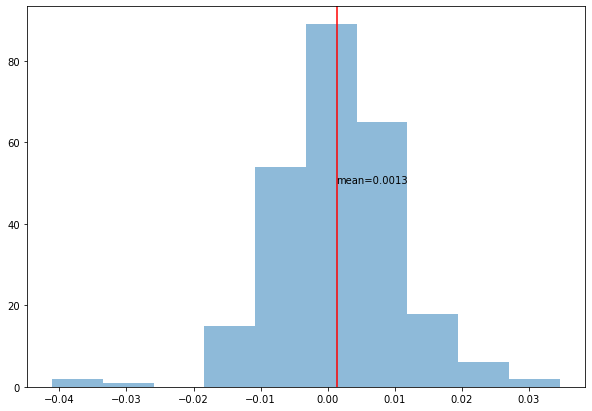

In [173]:
plt.figure(figsize=(10,7))
plt.hist(avg_ret,histtype='stepfilled',alpha=0.5)
plt.axvline(np.mean(avg_ret),color='r')
plt.text(np.mean(avg_ret),50,'mean='+ str(round(np.mean(avg_ret),4)),rotation=0)
np.mean(avg_ret)

The average daily return with 3 over-performed and 3 under-performed stocks for train set 0 with random forest forecast method is 0.13% without transaction fee. After cloud computation, I will see if the averge daily return will be better.